# Financial time series

In [1]:
import scipy.io as sio
mat_dict = sio.loadmat('./data/motion.mat')

In [2]:
mat_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'skel', 'Motion'])

In [3]:
def preprocess_data(Motion):

    n_seq = Motion.shape[1]

    # assume data is MIT format for now
    indx = np.r_[
        arange(0,6),
        arange(6,9),
        13,
        arange(18,21),
        25,
        arange(30,33),
        37,
        arange(42,45),
        49,
        arange(54,57),
        arange(60,63),
        arange(66,69),
        arange(72,75),
        arange(78,81),
        arange(84,87),
        arange(90,93),
        arange(96,99),
        arange(102,105)]

    row1 = Motion[0,0][0]

    offsets =   np.r_[
        row1[None,9:12],
        row1[None,15:18],
        row1[None,21:24],
        row1[None,27:30],
        row1[None,33:36],
        row1[None,39:42],
        row1[None,45:48],
        row1[None,51:54],
        row1[None,57:60],
        row1[None,63:66],
        row1[None,69:72],
        row1[None,75:78],
        row1[None,81:84],
        row1[None,87:90],
        row1[None,93:96],
        row1[None,99:102],
        row1[None,105:108]]

    # collapse sequences
    batchdata = np.concatenate([m[:, indx] for m in Motion.flat], axis=0)

    data_mean = batchdata.mean(axis=0)
    data_std = batchdata.std(axis=0)

    batchdata = (batchdata - data_mean) / data_std

    # get sequence lengths
    seqlen = [s.shape[0] for s in Motion.flat]


    return batchdata, seqlen, data_mean, data_std

In [4]:
# load data post preprocess1
from numpy import arange
mat_dict = sio.loadmat('./data/motion.mat')
Motion = mat_dict['Motion']

batchdata, seqlen, data_mean, data_std = preprocess_data(Motion)

## remarque
1. train data=batchdata: time series de dimension 49 such as batchdata.shape=(3826,49) (format: normalized data)
2. mean.shape=std.shape=(49,1): in order to normalize data input
3. seqlen: longeur de sequence (1 sequence: walking, runing => motion sequence)
4. loard_data: turn bathcdata into a theano tensor "shared_x". To access value: used get_values

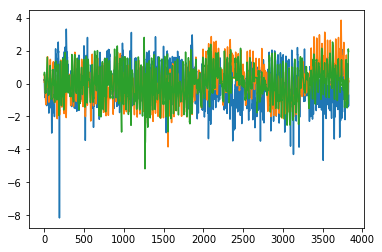

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
f_1=batchdata[:, 10]
f_2=batchdata[:, 1]
f_3=batchdata[:, 30]
plt.plot(f_1)
plt.plot(f_2)
plt.plot(f_3)

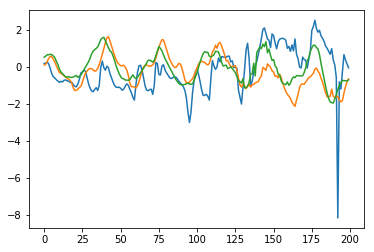

In [6]:
seq_1=f_1[:200]
seq_2=f_2[:200]
seq_3=f_3[:200]
plt.plot(seq_1)
plt.plot(seq_2)
plt.plot(seq_3)

In [7]:
import theano
shared_x = theano.shared(np.asarray(batchdata, dtype=theano.config.floatX))
(shared_x.get_value(borrow=True).shape[0])

3826

In [8]:
from pandas_datareader import data as pdr
def get_data_fromweb():
    data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    data=data.T
    symbol=data.loc['Symbol']
    symbol=list(symbol)

    #P=pd.DataFrame(columns=symbol[:100]).fillna(0.0)
    L=[]
    S=[]
    k=0
    for k in range(len(symbol)):
        if len(L)<150:
            try:
                #print(symbol[k])
                S.append(symbol[k])
                A=pdr.get_data_yahoo(symbol[k], start="2000-10-01", end="2019-01-01")['Adj Close']
                #P[symbol[k]]=A
                L.append(A)
                #print(A)
            except (RuntimeError, TypeError, NameError,KeyError):
                k+=1
        else:
            break
    X=pd.concat([L[i] for i in range(len(L))],axis=1)
        
    return(X,S)

data_sp=get_data_fromweb()

NameError: name 'pd' is not defined

In [9]:
import pandas as pd
data_sp=pd.read_csv('prixSPX')
data_sp.head(2)

,Date,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,...,Adj Close.104,Adj Close.105,Adj Close.106,Adj Close.107,Adj Close.108,Adj Close.109,Adj Close.110,Adj Close.111,Adj Close.112,Adj Close.113
0,2000-10-02,27.061932,13.551722,32.75,1.043002,40.486599,23.2500,56.528931,36.396790,8.112346,...,2.442155,3.116654,17.620169,3.660253,6.053134,8.056770,2.729167,9.545869,10.105733,25.287197
1,2000-10-03,27.744480,13.640066,32.50,1.080587,40.595272,23.6875,56.228783,35.663971,8.306054,...,2.486558,3.260885,17.832458,3.811049,6.098991,8.032792,2.791667,10.118251,10.123841,25.358013


In [10]:

prices=data_sp
prices_clean=prices.dropna(axis=1)
prices_clean.columns=[str(i) for i in range(115)]
prices_clean.index=prices_clean['0']

prix=prices_clean[[str(i) for i in range(1,50)]]
del prices_clean['0']



,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,,,,,,,,,,,,,,,,,,,,,
2000-10-02,27.061932,13.551722,32.75,1.043002,40.486599,23.2500,56.528931,36.396790,8.112346,31.659967,...,40.544266,14.841111,9.564555,19.354223,6.062063,34.229237,22.1250,21.393751,28.072353,20.450260
2000-10-03,27.744480,13.640066,32.50,1.080587,40.595272,23.6875,56.228783,35.663971,8.306054,33.264488,...,44.578003,14.920990,9.331269,19.305902,5.698340,33.701096,22.8125,21.422474,28.411026,20.179855
2000-10-04,28.187223,13.392702,31.50,1.118173,39.244686,24.5000,53.827553,33.994766,8.220821,36.238724,...,45.095161,14.841111,9.272950,20.006624,5.773702,33.238998,23.1875,20.991718,28.373398,19.165789
2000-10-05,27.523130,13.463375,31.75,1.127569,36.885033,23.5000,52.476868,34.116905,8.375787,34.516811,...,44.888298,14.777212,9.331269,20.809462,5.606568,33.734123,23.7500,21.106594,27.620792,18.929171
2000-10-06,27.209517,13.551722,35.00,1.118173,36.667706,22.0000,51.826538,34.198338,8.073608,32.677464,...,45.612293,14.026365,9.010515,20.712349,5.576181,33.569088,24.8750,21.077881,28.109993,18.624956


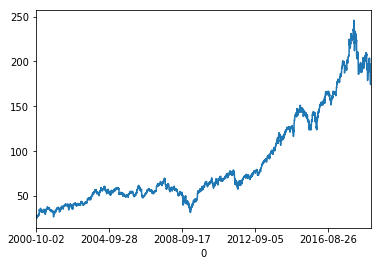

In [11]:
prices_clean['1'].plot()
prix.head()

In [12]:
def get_norm(data):
    mu=data.mean()
    sig=data.std()
    data_n=(data-mu)/sig
    return(data_n,mu,sig)

def get_return(Y):
    R=Y.pct_change()[1:]
    return(R)

    

In [13]:
L=[]
M=[]
S=[]
for x in prix.columns:
    r,mu,sig=get_norm(get_return(prix[x]))
    L.append(r)
    M.append(mu)
    S.append(sig)

R=pd.concat([L[i] for i in range(len(L))],axis=1)
R.columns=prix.columns    



In [14]:
R_clean=np.array(R.iloc[:3826])


In [15]:
def load_return():
    R_clean=np.array(R.iloc[:3826])
    data_std=np.array(S)
    data_mean=np.array(M)
    
    # put data into shared memory
    shared_x = theano.shared(np.asarray(R_clean, dtype=theano.config.floatX))
    return shared_x, seqlen, data_mean, data_std
    
    
    
    

In [16]:
from __future__ import print_function
import numpy
import numpy as np
import time

import theano
import theano.tensor as T

from theano.tensor.shared_randomstreams import RandomStreams

In [17]:
class CRBM(object):
    """Conditional Restricted Boltzmann Machine (CRBM)  """
    def __init__(self, input=None, input_history=None, n_visible=49,
                 n_hidden=500, delay=6, A=None, B=None, W=None, hbias=None,
                 vbias=None, numpy_rng=None,
                 theano_rng=None):
        """
        CRBM constructor. Defines the parameters of the model along with
        basic operations for inferring hidden from visible (and vice-versa),
        as well as for performing CD updates.

        :param input: None for standalone RBMs or symbolic variable if RBM is
        part of a larger graph.

        :param n_visible: number of visible units

        :param n_hidden: number of hidden units

        :param A: None for standalone CRBMs or symbolic variable pointing to a
        shared weight matrix in case CRBM is part of a CDBN network; in a CDBN,
        the weights are shared between CRBMs and layers of a MLP

        :param B: None for standalone CRBMs or symbolic variable pointing to a
        shared weight matrix in case CRBM is part of a CDBN network; in a CDBN,
        the weights are shared between CRBMs and layers of a MLP

        :param W: None for standalone CRBMs or symbolic variable pointing to a
        shared weight matrix in case CRBM is part of a CDBN network; in a CDBN,
        the weights are shared between CRBMs and layers of a MLP

        :param hbias: None for standalone CRBMs or symbolic variable pointing
        to a shared hidden units bias vector in case CRBM is part of a
        different network

        :param vbias: None for standalone RBMs or a symbolic variable
        pointing to a shared visible units bias
        """

        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.delay = delay

        if numpy_rng is None:
            # create a number generator
            numpy_rng = numpy.random.RandomState(1234)

        if theano_rng is None:
            theano_rng = RandomStreams(numpy_rng.randint(2 ** 30))

        if W is None:
            # the output of uniform if converted using asarray to dtype
            # theano.config.floatX so that the code is runable on GPU
            initial_W = np.asarray(0.01 * numpy_rng.randn(n_visible,
                                                          n_hidden),
                                    dtype=theano.config.floatX)
            # theano shared variables for weights and biases
            W = theano.shared(value=initial_W, name='W')

        if A is None:
            initial_A = np.asarray(0.01 * numpy_rng.randn(n_visible * delay,
                                                           n_visible),
                                    dtype=theano.config.floatX)
            # theano shared variables for weights and biases
            A = theano.shared(value=initial_A, name='A')

        if B is None:
            initial_B = np.asarray(0.01 * numpy_rng.randn(n_visible * delay,
                                                           n_hidden),
                                    dtype=theano.config.floatX)
            # theano shared variables for weights and biases
            B = theano.shared(value=initial_B, name='B')

        if hbias is None:
            # create shared variable for hidden units bias
            hbias = theano.shared(value=numpy.zeros(n_hidden,
                                dtype=theano.config.floatX), name='hbias')

        if vbias is None:
            # create shared variable for visible units bias
            vbias = theano.shared(value=numpy.zeros(n_visible,
                                dtype=theano.config.floatX), name='vbias')

        # initialize input layer for standalone CRBM or layer0 of CDBN
        self.input = input
        if not input:
            self.input = T.matrix('input')

        self.input_history = input_history
        if not input_history:
            self.input_history = T.matrix('input_history')

        self.W = W
        self.A = A
        self.B = B
        self.hbias = hbias
        self.vbias = vbias
        self.theano_rng = theano_rng
        # **** WARNING: It is not a good idea to put things in this list
        # other than shared variables created in this function.
        self.params = [self.W, self.A, self.B, self.hbias, self.vbias]

    def free_energy(self, v_sample, v_history):
        ''' Function to compute the free energy of a sample conditional
        on the history '''
        wx_b = T.dot(v_sample, self.W) + T.dot(v_history, self.B) + self.hbias
        ax_b = T.dot(v_history, self.A) + self.vbias
        visible_term = T.sum(0.5 * T.sqr(v_sample - ax_b), axis=1)
        hidden_term = T.sum(T.log(1 + T.exp(wx_b)), axis=1)

        return visible_term - hidden_term

    def propup(self, vis, v_history):
        ''' This function propagates the visible units activation upwards to
        the hidden units

        Note that we return also the pre-sigmoid activation of the layer. As
        it will turn out later, due to how Theano deals with optimizations,
        this symbolic variable will be needed to write down a more
        stable computational graph (see details in the reconstruction cost
        function)
        '''
        pre_sigmoid_activation = T.dot(vis, self.W) + \
                                 T.dot(v_history, self.B) + self.hbias
        return [pre_sigmoid_activation, T.nnet.sigmoid(pre_sigmoid_activation)]

    def sample_h_given_v(self, v0_sample, v_history):
        ''' This function infers state of hidden units given visible units '''
        # compute the activation of the hidden units given a sample of the
        # visibles
        #pre_sigmoid_h1, h1_mean = self.propup(v0_sample)
        pre_sigmoid_h1, h1_mean = self.propup(v0_sample, v_history)
        # get a sample of the hiddens given their activation
        # Note that theano_rng.binomial returns a symbolic sample of dtype
        # int64 by default. If we want to keep our computations in floatX
        # for the GPU we need to specify to return the dtype floatX
        h1_sample = self.theano_rng.binomial(size=h1_mean.shape, n=1,
                                             p=h1_mean,
                                             dtype=theano.config.floatX)
        return [pre_sigmoid_h1, h1_mean, h1_sample]

    def propdown(self, hid, v_history):
        '''This function propagates the hidden units activation downwards to
        the visible units

        Note that we return also the pre_sigmoid_activation of the layer. As
        it will turn out later, due to how Theano deals with optimizations,
        this symbolic variable will be needed to write down a more
        stable computational graph (see details in the reconstruction cost
        function)
        '''
        mean_activation = T.dot(hid, self.W.T) + T.dot(v_history, self.A) + \
                          self.vbias
        return mean_activation

    def sample_v_given_h(self, h0_sample, v_history):
        ''' This function infers state of visible units given hidden units '''
        # compute the activation of the visible given the hidden sample
        #pre_sigmoid_v1, v1_mean = self.propdown(h0_sample)
        v1_mean = self.propdown(h0_sample, v_history)
        # get a sample of the visible given their activation
        # Note that theano_rng.binomial returns a symbolic sample of dtype
        # int64 by default. If we want to keep our computations in floatX
        # for the GPU we need to specify to return the dtype floatX
        #v1_sample = self.theano_rng.binomial(size=v1_mean.shape,
        #                                     n=1, p=v1_mean,
        #        dtype = theano.config.floatX)
        v1_sample = v1_mean  # mean-field
        return [v1_mean, v1_sample]

    def gibbs_hvh(self, h0_sample, v_history):
        ''' This function implements one step of Gibbs sampling,
            starting from the hidden state'''
        v1_mean, v1_sample = self.sample_v_given_h(h0_sample, v_history)
        pre_sigmoid_h1, h1_mean, h1_sample = self.sample_h_given_v(v1_sample,
                                                                   v_history)

        return [v1_mean, v1_sample, pre_sigmoid_h1, h1_mean, h1_sample]

    def gibbs_vhv(self, v0_sample, v_history):
        ''' This function implements one step of Gibbs sampling,
            starting from the visible state'''
        #pre_sigmoid_h1, h1_mean, h1_sample = self.sample_h_given_v(v0_sample)
        #pre_sigmoid_v1, v1_mean, v1_sample = self.sample_v_given_h(h1_sample)
        pre_sigmoid_h1, h1_mean, h1_sample = self.sample_h_given_v(v0_sample,
                                                                   v_history)
        v1_mean, v1_sample = self.sample_v_given_h(h1_sample, v_history)

        return [pre_sigmoid_h1, h1_mean, h1_sample, v1_mean, v1_sample]

    def get_cost_updates(self, lr=0.1, k=1):
        """
        This functions implements one step of CD-k

        :param lr: learning rate used to train the RBM

        :param persistent: None for CD

        :param k: number of Gibbs steps to do in CD-k

        Returns a proxy for the cost and the updates dictionary. The
        dictionary contains the update rules for weights and biases but
        also an update of the shared variable used to store the persistent
        chain, if one is used.
        """

        # compute positive phase
        pre_sigmoid_ph, ph_mean, ph_sample = \
                        self.sample_h_given_v(self.input, self.input_history)

        # for CD, we use the newly generate hidden sample
        chain_start = ph_sample

        # perform actual negative phase
        # in order to implement CD-k we need to scan over the
        # function that implements one gibbs step k times.
        # Read Theano tutorial on scan for more information :
        # http://deeplearning.net/software/theano/library/scan.html
        # the scan will return the entire Gibbs chain
        # updates dictionary is important because it contains the updates
        # for the random number generator
        [nv_means, nv_samples, pre_sigmoid_nhs, nh_means,
         nh_samples], updates = theano.scan(self.gibbs_hvh,
                    # the None are place holders, saying that
                    # chain_start is the initial state corresponding to the
                    # 5th output
                    outputs_info=[None, None, None, None, chain_start],
                    non_sequences=self.input_history,
                    n_steps=k)

        # determine gradients on CRBM parameters
        # not that we only need the sample at the end of the chain
        chain_end = nv_samples[-1]

        cost = T.mean(self.free_energy(self.input, self.input_history)) - \
               T.mean(self.free_energy(chain_end, self.input_history))
        # We must not compute the gradient through the gibbs sampling
        gparams = T.grad(cost, self.params, consider_constant=[chain_end])

        # constructs the update dictionary
        for gparam, param in zip(gparams, self.params):
            # make sure that the learning rate is of the right dtype
            if param == self.A:
                # slow down autoregressive updates
                updates[param] = param - gparam * 0.01 * \
                                 T.cast(lr, dtype=theano.config.floatX)
            else:
                updates[param] = param - gparam * \
                                 T.cast(lr, dtype=theano.config.floatX)

        # reconstruction error is a better proxy for CD
        monitoring_cost = self.get_reconstruction_cost(updates, nv_means[-1])

        return monitoring_cost, updates

    def get_reconstruction_cost(self, updates, pre_sigmoid_nv):
        """Approximation to the reconstruction error
        """
        # sum over dimensions, mean over cases
        recon = T.mean(T.sum(T.sqr(self.input - pre_sigmoid_nv), axis=1))

        return recon

    def generate(self, orig_data, orig_history, n_samples, n_gibbs=30):
        """ Given initialization(s) of visibles and matching history, generate
        n_samples in future.

        orig_data : n_seq by n_visibles array
            initialization for first frame
        orig_history : n_seq by delay * n_visibles array
            delay-step history
        n_samples : int
            number of samples to generate forward
        n_gibbs : int
            number of alternating Gibbs steps per iteration"""
        n_seq = orig_data.shape[0] #cad 4
        persistent_vis_chain = theano.shared(orig_data)
        persistent_history = theano.shared(orig_history)

        #persistent_history = T.matrix('persistent_history')

        [presig_hids, hid_mfs, hid_samples, vis_mfs, vis_samples], updates =  \
                            theano.scan(self.gibbs_vhv,
                                    outputs_info=[None, None, None, None,
                                                    persistent_vis_chain],
                                    non_sequences=persistent_history,
                                    n_steps=n_gibbs)

        # add to updates the shared variable that takes care of our persistent
        # chain
        # initialize next visible with current visible
        # shift the history one step forward
        updates[persistent_vis_chain] = vis_samples[-1]
        updates[persistent_history] = T.concatenate(
                             (vis_samples[-1],
                                 persistent_history[:, :(self.delay - 1) * \
                                                    self.n_visible],
                              ), axis=1)
        # construct the function that implements our persistent chain.
        # we generate the "mean field" activations for plotting and the actual
        # samples for reinitializing the state of our persistent chain
        sample_fn = theano.function([], [vis_mfs[-1], vis_samples[-1]],
                            updates=updates,
                            name='sample_fn')

        #vis_mf, vis_sample = sample_fn()
        #print orig_data[:,1:5]
        #print vis_mf[:,1:5]
        generated_series = np.empty((n_seq, n_samples, self.n_visible))
        for t in range(n_samples):
            #print("Generating frame %d" % t)
            vis_mf, vis_sample = sample_fn()
            generated_series[:, t, :] = vis_mf
        return generated_series


def train_crbm(learning_rate=1e-3, training_epochs=2000,
             dataset='./data/motion.mat', batch_size=100,
             n_hidden=100, delay=6):
    """
    Demonstrate how to train a CRBM.
    This is demonstrated on mocap data.

    :param learning_rate: learning rate used for training the CRBM

    :param training_epochs: number of epochs used for training

    :param dataset: path the the dataset (matlab format)

    :param batch_size: size of a batch used to train the RBM

    """

    rng = numpy.random.RandomState(123)
    theano_rng = RandomStreams(rng.randint(2 ** 30))

    # batchdata is returned as theano shared variable floatX
    #batchdata, seqlen, data_mean, data_std = load_data(dataset)
    batchdata, seqlen, data_mean, data_std = load_return()

    # compute number of minibatches for training, validation and testing
    n_train_batches = (batchdata.get_value(borrow=True).shape[0] / delay * len(seqlen)) / batch_size
    n_dim = batchdata.get_value(borrow=True).shape[1]

    # valid starting indices
    batchdataindex = []
    last = 0
    #seqlen: liste de 3 elements
    for s in seqlen:
        batchdataindex += list(range(last + delay, last + s))
        last += s

    permindex = np.array(batchdataindex)
    rng.shuffle(permindex)

    # allocate symbolic variables for the data
    index = T.lvector()    # index to a [mini]batch
    index_hist = T.lvector()  # index to history
    x = T.matrix('x')  # the data
    x_history = T.matrix('x_history')

    #theano.config.compute_test_value='warn'
    #x.tag.test_value = np.random.randn(batch_size, n_dim)
    #x_history.tag.test_value = np.random.randn(batch_size, n_dim*delay)

    # initialize storage for the persistent chain
    # (state = hidden layer of chain)

    # construct the CRBM class
    crbm = CRBM(input=x, input_history=x_history, n_visible=n_dim, \
                n_hidden=n_hidden, delay=delay, numpy_rng=rng,
                theano_rng=theano_rng)

    # get the cost and the gradient corresponding to one step of CD-15
    cost, updates = crbm.get_cost_updates(lr=learning_rate, k=1)

    #################################
    #     Training the CRBM         #
    #################################

    # the purpose of train_crbm is solely to update the CRBM parameters
    train_crbm = theano.function([index, index_hist], cost,
           updates=updates,
           givens={x: batchdata[index], \
                      x_history: batchdata[index_hist].reshape((
                       batch_size, delay * n_dim))},
           name='train_crbm')

    plotting_time = 0.
    start_time = time.clock()

    mean_cost_list = []
    # go through training epochs
    for epoch in range(training_epochs):

        # go through the training set
        mean_cost = []
        for batch_index in range(int(n_train_batches)):

            # indexing is slightly complicated
            # build a linear index to the starting frames for this batch
            # (i.e. time t) gives a batch_size length array for data
            data_idx = permindex[batch_index * batch_size:(batch_index + 1) \
                                 * batch_size]

            # now build a linear index to the frames at each delay tap
            # (i.e. time t-1 to t-delay)
            # gives a batch_size x delay array of indices for history
            hist_idx = np.array([data_idx - n for n in range(1, delay + 1)]).T

            this_cost = train_crbm(data_idx, hist_idx.ravel())
            #print batch_index, this_cost
            mean_cost += [this_cost]

        mean_cost_list.append(numpy.mean(mean_cost))
        print('Training epoch %d, cost is ' % epoch, mean_cost_list[-1])

    cost_plot(mean_cost_list)
    end_time = time.clock()

    pretraining_time = (end_time - start_time)

    print(('Training took %f minutes' % (pretraining_time / 60.)))

    return crbm, batchdata

def cost_plot(mean_cost):
    import pylab as plt

    plt.plot(mean_cost, ',')
    plt.xlabel('epoch')
    plt.ylabel('mean cost')
    plt.savefig('cost.png')

def plot(data_idx, bd, generated_series):
    import pylab as plt

    n_samples = generated_series[0].shape[0] - crbm.delay
    # plot first dimension of each sequence
    for i in range(len(generated_series)):
        # original
        start = data_idx[i]
        plt.subplot(len(generated_series), 1, i+1)
        plt.plot(bd[start - crbm.delay:start + n_samples - crbm.delay, 1],
                 label='true', linestyle=':')
        plt.plot(generated_series[i, :n_samples, 1], label='predicted',
                 linestyle='-')
        plt.yticks(fontsize=9)

    leg = plt.legend()
    ltext = leg.get_texts()  # all the text.Text instance in the legend
    plt.setp(ltext, fontsize=9)

    plt.tight_layout()
    plt.savefig('result.png')

def plot_new(data_idx, bd, generated_series):
    import pylab as plt

    n_samples = generated_series[0].shape[0] - crbm.delay
    # plot first dimension of each sequence
    for i in range(len(generated_series)):
        # original
        start = data_idx[i]
        plt.figure()
        plt.plot(bd[start - crbm.delay:start + n_samples - crbm.delay, 1],
                 label='true', linestyle=':')
        plt.plot(generated_series[i, :n_samples, 1], label='predicted',
                 linestyle='-')
        
        plt.figure()
        true=bd[start - crbm.delay:start + n_samples - crbm.delay, 1]
        gene=generated_series[i, :n_samples, 1]
        bins=np.linspace(np.min(true),np.max(true),50)
        plt.hist(true,bins,alpha=0.5)[2]
        plt.hist(gene,bins,alpha=0.5)[2]
    plt.legend()


/Users/julesroche/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:389: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Training epoch 0, cost is  53.44015736969892
Training epoch 1, cost is  53.36865758746772
Training epoch 2, cost is  53.31782009475824
Training epoch 3, cost is  53.27580949311623
Training epoch 4, cost is  53.160450184023844
Training epoch 5, cost is  53.08329703026409
Training epoch 6, cost is  53.0175174315015
Training epoch 7, cost is  52.964484084431895
Training epoch 8, cost is  52.88284724300002
Training epoch 9, cost is  52.758020150650694
Training epoch 10, cost is  52.66861204134066
Training epoch 11, cost is  52.54504654940518
Training epoch 12, cost is  52.329937518967235
Training epoch 13, cost is  52.22020449075483
Training epoch 14, cost is  51.935442301571655
Training epoch 15, cost is  51.83227869089749
Training epoch 16, cost is  51.57793732771069
Training epoch 17, cost is  51.1240759667813
Training epoch 18, cost is  50.83676435047046
Training epoch 19, cost is  50.558272672756644
Training epoch 20, cost is  50.11523991094266
Training epoch 21, cost is  49.629540836

Training epoch 178, cost is  35.79159815462844
Training epoch 179, cost is  35.837272934915305
Training epoch 180, cost is  35.775930831446715
Training epoch 181, cost is  35.70165705337798
Training epoch 182, cost is  35.71150406932161
Training epoch 183, cost is  35.59910689089511
Training epoch 184, cost is  35.66848762676687
Training epoch 185, cost is  35.717736508842926
Training epoch 186, cost is  35.65321869905947
Training epoch 187, cost is  35.52883731996191
Training epoch 188, cost is  35.64239543596825
Training epoch 189, cost is  35.58675290175929
Training epoch 190, cost is  35.64791079288569
Training epoch 191, cost is  35.508144045416195
Training epoch 192, cost is  35.50739451586763
Training epoch 193, cost is  35.5249710447472
Training epoch 194, cost is  35.559590070918176
Training epoch 195, cost is  35.45679615107038
Training epoch 196, cost is  35.436401554728576
Training epoch 197, cost is  35.42325724425226
Training epoch 198, cost is  35.39797351490306
Training

Training epoch 355, cost is  32.919368196972584
Training epoch 356, cost is  32.95153672415276
Training epoch 357, cost is  32.90051078958929
Training epoch 358, cost is  32.93731680558076
Training epoch 359, cost is  32.94104765902984
Training epoch 360, cost is  32.824614439809324
Training epoch 361, cost is  32.793888547067105
Training epoch 362, cost is  32.794383459873806
Training epoch 363, cost is  32.929201063846186
Training epoch 364, cost is  32.87836271285388
Training epoch 365, cost is  32.84508661348991
Training epoch 366, cost is  32.7683669065892
Training epoch 367, cost is  32.82629476756671
Training epoch 368, cost is  32.66699709363416
Training epoch 369, cost is  32.862528971203666
Training epoch 370, cost is  32.68527674114407
Training epoch 371, cost is  32.81516834508062
Training epoch 372, cost is  32.66390296024268
Training epoch 373, cost is  32.681441312544464
Training epoch 374, cost is  32.754286540896224
Training epoch 375, cost is  32.70048247899075
Traini

Training epoch 530, cost is  31.120034963096767
Training epoch 531, cost is  31.253064130758204
Training epoch 532, cost is  31.241199628016034
Training epoch 533, cost is  31.243773805210218
Training epoch 534, cost is  31.24140188885975
Training epoch 535, cost is  31.228702471322503
Training epoch 536, cost is  31.15211927902823
Training epoch 537, cost is  31.016508254231738
Training epoch 538, cost is  31.10773410084777
Training epoch 539, cost is  31.035759609717736
Training epoch 540, cost is  31.213269894777934
Training epoch 541, cost is  31.067943126229352
Training epoch 542, cost is  30.907439821493586
Training epoch 543, cost is  31.117162250725606
Training epoch 544, cost is  31.07572655007902
Training epoch 545, cost is  31.11903015447314
Training epoch 546, cost is  31.086855863132076
Training epoch 547, cost is  31.07103677379084
Training epoch 548, cost is  30.90899638360699
Training epoch 549, cost is  31.19757268260245
Training epoch 550, cost is  31.09903585666694
T

Training epoch 708, cost is  30.093423177697552
Training epoch 709, cost is  30.118919211091082
Training epoch 710, cost is  30.109202456134923
Training epoch 711, cost is  30.039561086745955
Training epoch 712, cost is  30.18167445478986
Training epoch 713, cost is  30.172616626146255
Training epoch 714, cost is  30.156801417535696
Training epoch 715, cost is  30.021632571256227
Training epoch 716, cost is  29.97464302393734
Training epoch 717, cost is  30.073042315431195
Training epoch 718, cost is  29.96519656816177
Training epoch 719, cost is  30.202673369556763
Training epoch 720, cost is  30.16816224992212
Training epoch 721, cost is  30.098214167929033
Training epoch 722, cost is  30.141921757843676
Training epoch 723, cost is  30.058123763794402
Training epoch 724, cost is  30.064806541005964
Training epoch 725, cost is  29.97462278066222
Training epoch 726, cost is  30.17752819109916
Training epoch 727, cost is  30.083824423287325
Training epoch 728, cost is  30.07798186033434

Training epoch 881, cost is  29.727045947712597
Training epoch 882, cost is  29.713055849412214
Training epoch 883, cost is  29.84758585745134
Training epoch 884, cost is  29.692768911628814
Training epoch 885, cost is  29.710344535710096
Training epoch 886, cost is  29.597834284537605
Training epoch 887, cost is  29.644241022838067
Training epoch 888, cost is  29.79928103975177
Training epoch 889, cost is  29.701428073797263
Training epoch 890, cost is  29.698923199706247
Training epoch 891, cost is  29.69308586160586
Training epoch 892, cost is  29.7428706112512
Training epoch 893, cost is  29.627500005715135
Training epoch 894, cost is  29.675225440607008
Training epoch 895, cost is  29.60153698841798
Training epoch 896, cost is  29.64780616990956
Training epoch 897, cost is  29.69632813651457
Training epoch 898, cost is  29.610046714726117
Training epoch 899, cost is  29.747941713209414
Training epoch 900, cost is  29.58900767492244
Training epoch 901, cost is  29.77558855971701
Tr

Training epoch 1055, cost is  29.75050563682104
Training epoch 1056, cost is  29.85154410403448
Training epoch 1057, cost is  29.563016436272644
Training epoch 1058, cost is  29.567400372451015
Training epoch 1059, cost is  29.571936076251212
Training epoch 1060, cost is  29.603829702834645
Training epoch 1061, cost is  29.45237892477087
Training epoch 1062, cost is  29.38055498148097
Training epoch 1063, cost is  29.67603224132152
Training epoch 1064, cost is  29.651711289932877
Training epoch 1065, cost is  29.538897829316973
Training epoch 1066, cost is  29.721269207423976
Training epoch 1067, cost is  29.664702635715237
Training epoch 1068, cost is  29.77463769056642
Training epoch 1069, cost is  29.60497187405538
Training epoch 1070, cost is  29.636020921186017
Training epoch 1071, cost is  29.55100325668672
Training epoch 1072, cost is  29.40079159726049
Training epoch 1073, cost is  29.598226163463252
Training epoch 1074, cost is  29.499303916646333
Training epoch 1075, cost is 

Training epoch 1225, cost is  29.467331901193923
Training epoch 1226, cost is  29.802460600910905
Training epoch 1227, cost is  29.644410417550645
Training epoch 1228, cost is  29.5473081591836
Training epoch 1229, cost is  29.758089838070568
Training epoch 1230, cost is  29.587550657289714
Training epoch 1231, cost is  29.68780251059706
Training epoch 1232, cost is  29.60165978864893
Training epoch 1233, cost is  29.495103700285306
Training epoch 1234, cost is  29.605388201969646
Training epoch 1235, cost is  29.749261159235697
Training epoch 1236, cost is  29.438822526001285
Training epoch 1237, cost is  29.83978752377111
Training epoch 1238, cost is  29.693959592558475
Training epoch 1239, cost is  29.600166263685214
Training epoch 1240, cost is  29.92160431044611
Training epoch 1241, cost is  29.680396890133682
Training epoch 1242, cost is  29.678151948584826
Training epoch 1243, cost is  29.354660741433744
Training epoch 1244, cost is  29.689246790806727
Training epoch 1245, cost 

Training epoch 1399, cost is  29.869109239554092
Training epoch 1400, cost is  29.84363309468492
Training epoch 1401, cost is  29.856076495160185
Training epoch 1402, cost is  29.76383343951042
Training epoch 1403, cost is  29.654340658438752
Training epoch 1404, cost is  29.700777905314435
Training epoch 1405, cost is  29.73849226493149
Training epoch 1406, cost is  29.717475479804126
Training epoch 1407, cost is  29.861626402144854
Training epoch 1408, cost is  29.84273426503831
Training epoch 1409, cost is  29.823155362622657
Training epoch 1410, cost is  29.946979197782458
Training epoch 1411, cost is  29.73043272140742
Training epoch 1412, cost is  29.697488362420646
Training epoch 1413, cost is  29.67743171895118
Training epoch 1414, cost is  29.865067057128886
Training epoch 1415, cost is  29.682693546334857
Training epoch 1416, cost is  29.72088128901362
Training epoch 1417, cost is  29.631196262250413
Training epoch 1418, cost is  29.862019173185384
Training epoch 1419, cost i

Training epoch 1570, cost is  29.751612151487045
Training epoch 1571, cost is  29.668672339136126
Training epoch 1572, cost is  29.911939571401124
Training epoch 1573, cost is  29.941136951934247
Training epoch 1574, cost is  29.730392030989307
Training epoch 1575, cost is  29.69952113244374
Training epoch 1576, cost is  29.91007198927723
Training epoch 1577, cost is  29.685547796529846
Training epoch 1578, cost is  29.774842893260722
Training epoch 1579, cost is  29.84257784424977
Training epoch 1580, cost is  30.03047045764107
Training epoch 1581, cost is  29.83514449770402
Training epoch 1582, cost is  29.719475629228487
Training epoch 1583, cost is  29.81475976583089
Training epoch 1584, cost is  30.005913135136282
Training epoch 1585, cost is  29.86221276710003
Training epoch 1586, cost is  29.644064999165188
Training epoch 1587, cost is  29.792574803368367
Training epoch 1588, cost is  29.926218097229132
Training epoch 1589, cost is  29.824510686568427
Training epoch 1590, cost i

Training epoch 1739, cost is  30.004422945364535
Training epoch 1740, cost is  29.899235527521753
Training epoch 1741, cost is  29.95210904574616
Training epoch 1742, cost is  29.971898403322275
Training epoch 1743, cost is  29.942096452723824
Training epoch 1744, cost is  30.00859405148714
Training epoch 1745, cost is  29.747251752831314
Training epoch 1746, cost is  30.05492159933596
Training epoch 1747, cost is  29.968145427476287
Training epoch 1748, cost is  30.148462311195424
Training epoch 1749, cost is  29.912526066134713
Training epoch 1750, cost is  29.82087445897185
Training epoch 1751, cost is  29.93379660517105
Training epoch 1752, cost is  29.952536137582605
Training epoch 1753, cost is  29.937754268317263
Training epoch 1754, cost is  29.947263281582224
Training epoch 1755, cost is  29.80709191647404
Training epoch 1756, cost is  30.001338620319977
Training epoch 1757, cost is  29.94918931718633
Training epoch 1758, cost is  30.014444007968216
Training epoch 1759, cost i

Training epoch 1910, cost is  30.04642276706095
Training epoch 1911, cost is  30.06395386847381
Training epoch 1912, cost is  29.805491729405162
Training epoch 1913, cost is  30.147702506499716
Training epoch 1914, cost is  29.90916633501343
Training epoch 1915, cost is  30.13551292467499
Training epoch 1916, cost is  29.975882027623374
Training epoch 1917, cost is  30.006190457247612
Training epoch 1918, cost is  30.050975488263763
Training epoch 1919, cost is  30.03399454005683
Training epoch 1920, cost is  30.03513830921186
Training epoch 1921, cost is  30.098318122079725
Training epoch 1922, cost is  29.907038734374964
Training epoch 1923, cost is  29.943443733580004
Training epoch 1924, cost is  30.062532819165988
Training epoch 1925, cost is  29.836318344678663
Training epoch 1926, cost is  30.022286606622995
Training epoch 1927, cost is  30.00078257887951
Training epoch 1928, cost is  30.03076300354086
Training epoch 1929, cost is  30.00218047682783
Training epoch 1930, cost is 

/Users/julesroche/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:418: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


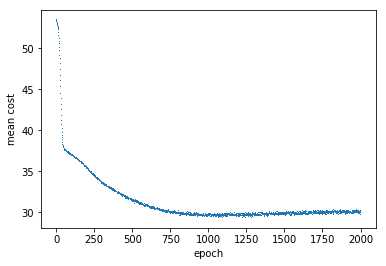

In [18]:
crbm, batchdata = train_crbm()

In [19]:


# Generate some sequences (in parallel) from CRBM
# Using training data as initialization

# pick some starting points for each sequence
data_idx = np.array([100, 200, 400, 600])
orig_data = numpy.asarray(batchdata.get_value(borrow=True)[data_idx],
                          dtype=theano.config.floatX)

hist_idx = np.array([data_idx - n for n in range(1, crbm.delay + 1)]).T
hist_idx = hist_idx.ravel()

orig_history = numpy.asarray(
    batchdata.get_value(borrow=True)[hist_idx].reshape(
    (len(data_idx), crbm.delay * crbm.n_visible)),
    dtype=theano.config.floatX)

generated_series = crbm.generate(orig_data, orig_history, n_samples=1000,
                                 n_gibbs=30)
# append initialization
generated_series = np.concatenate((orig_history.reshape(len(data_idx),
                                                        crbm.delay,
                                                        crbm.n_visible \
                                                        )[:, ::-1, :],
                                   generated_series), axis=1)

bd = batchdata.get_value(borrow=True)


No handles with labels found to put in legend.


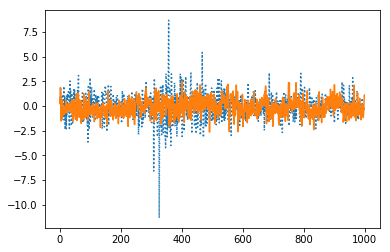

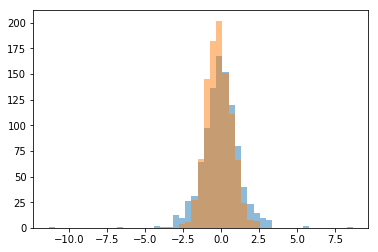

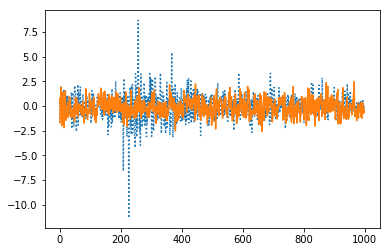

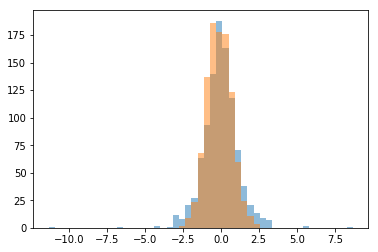

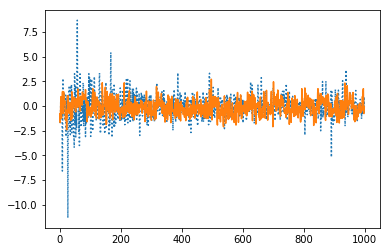

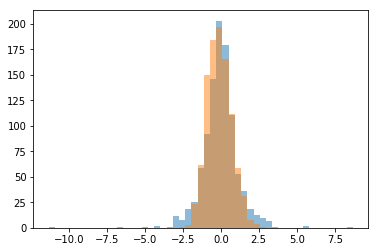

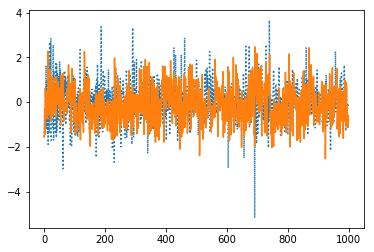

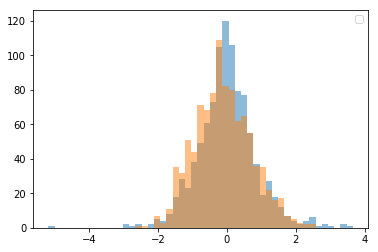

In [20]:
plot_new(data_idx, bd, generated_series)

In [21]:
gene_spatial=pd.DataFrame(generated_series[0])
gene_spatial.columns=prix.columns

df_gene=gene_spatial[[str(i) for i in range(1,10)]]
#corr_gene=gene_spatial.corr()


In [22]:
n_samples = generated_series[0].shape[0] - crbm.delay
T_final=[]
for k in range(49):
    T=[]
    for i in range(len(generated_series)):
        # original
        start = data_idx[i]
        true=bd[start - crbm.delay:start + n_samples, k]
        T.append(true)
    T_n=pd.concat([pd.DataFrame(T[i]) for i in range(len(T))],axis=1)
    T_final.append(np.array(T_n))



In [24]:
df_ = np.dstack(T_final).reshape(4,1006,49)
true_spatial=pd.DataFrame(df_[0])
true_spatial.columns=prix.columns

df_true=true_spatial[[str(i) for i in range(1,10)]]

#corr_true = true_spatial.corr()

## Correlation spatiale analyisis

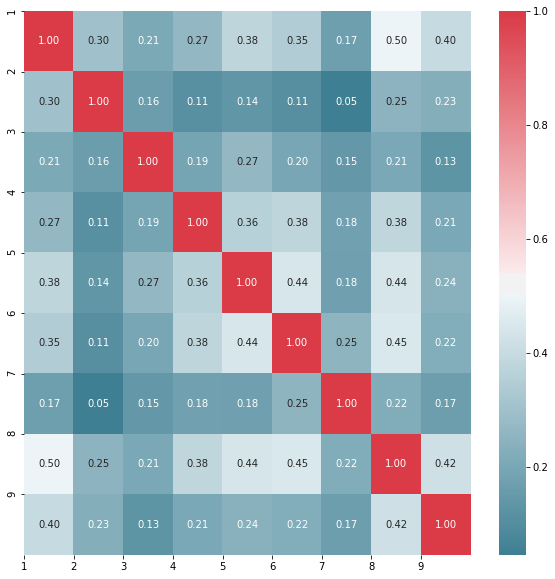

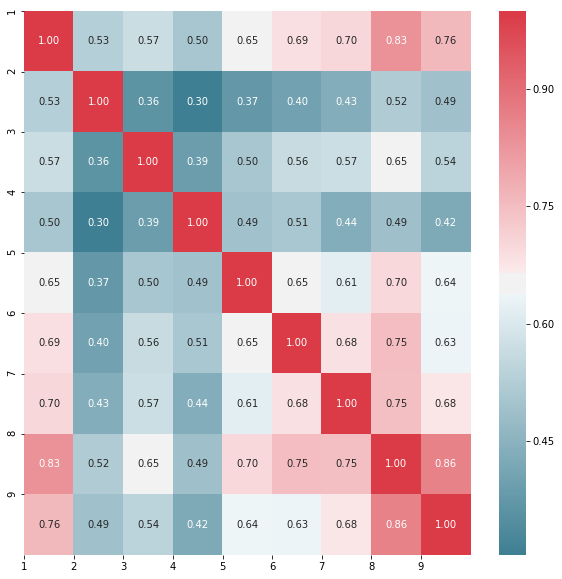

In [25]:
import seaborn as sns

def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    
heatMap(df_true)
heatMap(df_gene)


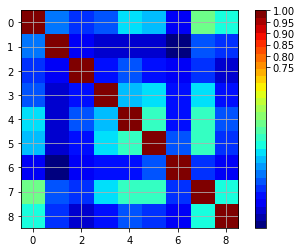

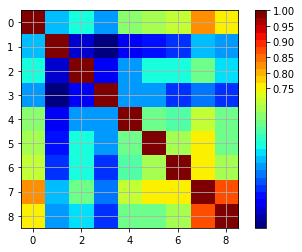

In [26]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)

    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()
    
correlation_matrix(df_true)
correlation_matrix(df_gene)

<a list of 49 Patch objects>

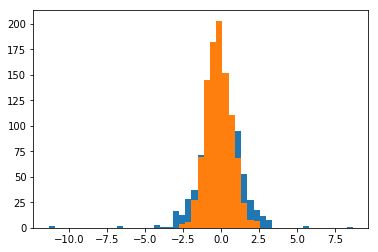

In [32]:
df_t_0=df_true[str(2)]
df_g_0=df_gene[str(2)]

bins=np.linspace(np.min(df_t_0),np.max(df_t_0),50)
plt.hist(df_t_0,bins)[2]
plt.hist(df_g_0,bins)[2]

## remarques:
1. batchdata.shape=(3826,49): tensor. Pour avoir les valeurs: batchdata.getvalue()
2. orig_data valeurs accocié a data_index example: e= batchdata.getvalue()(index=100)=> renvoie un vecteur de taille (49,) donc batchdata.getvalue()(data_idex) vecteur de taille (4,49)= orig_data
3. hist_idx: vecteur qui a ete flatten renvoie les 6 past index value de chaque composante de org_data= 6*4 =24 // example: si data_index=100 => 6 premeirers valeur de org_data = 94,95,...,100
4. orig_history: valeurs associé au index de hist_idex= comme il y a 6 jours de delays et qu'on est en dimension 49 donc pour chacune des 4 sequence = on a 6 jours * 49 =294 valeurs
5. orig_history est ensuite reshaper sous la forme : (4,6,49)
6. pour former la generated series: on concacten org_history avec les nouvelles valeurs generés
7. generated series: shape=(4,106,49) 106= 6=delay + 100=n_sample: result from the concatenation
8. bd : true value

## importants settings
1. n_sample=100 => ok for spatial correlation // n_sample=1000 => -- bad

In [ ]:
batchdata, seqlen, data_mean, data_std = load_return()

data_idx = np.array([100, 200, 400, 600])
orig_data = numpy.asarray(batchdata.get_value(borrow=True)[data_idx],
                          dtype=theano.config.floatX)

In [ ]:
e=batchdata.get_value(borrow=True)[100]

In [ ]:
hist_idx

In [ ]:
print(49*6)

In [ ]:
H=orig_history.reshape(len(data_idx),crbm.delay,crbm.n_visible )[:, ::-1, :]

In [ ]:
H_n=orig_history.reshape(len(data_idx),crbm.delay,crbm.n_visible )[:, ::-1, :]